In [1]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns 
import pandas.testing
import matplotlib.pyplot as plt
import os 
%matplotlib inline

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

/Users/fatimasoytemiz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.getcwd()

'/Users/fatimasoytemiz/Desktop/Springboard/Capstone 1'

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# number of missings
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missings.

In [6]:
# Unique values for each column
df.nunique().sort_values(ascending = False)

EmployeeNumber              1470
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
WorkLifeBalance                4
RelationshipSatisfaction       4
JobSatisfaction                4
JobInvolvement                 4
EnvironmentSatisfaction        4
StockOptionLevel               4
BusinessTravel                 3
Department                     3
MaritalStatus                  3
OverTime                       2
PerformanceRating              2
Attrition 

In [7]:
# Remove EmployeeCount, StandardHours, Over18 since there is no variation
df = df.drop(df[["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"]], axis = 1)

In [8]:
df.duplicated().sum()

0

There is no duplicate rows.

In [9]:
df["Attrition"] = np.where(df["Attrition"] == "Yes", 1, 0)

# Pair Plot

In [10]:
# plt.figure(figsize=[20,20])
# sns.pairplot(df.select_dtypes(include=["int"]))

# Heat Map

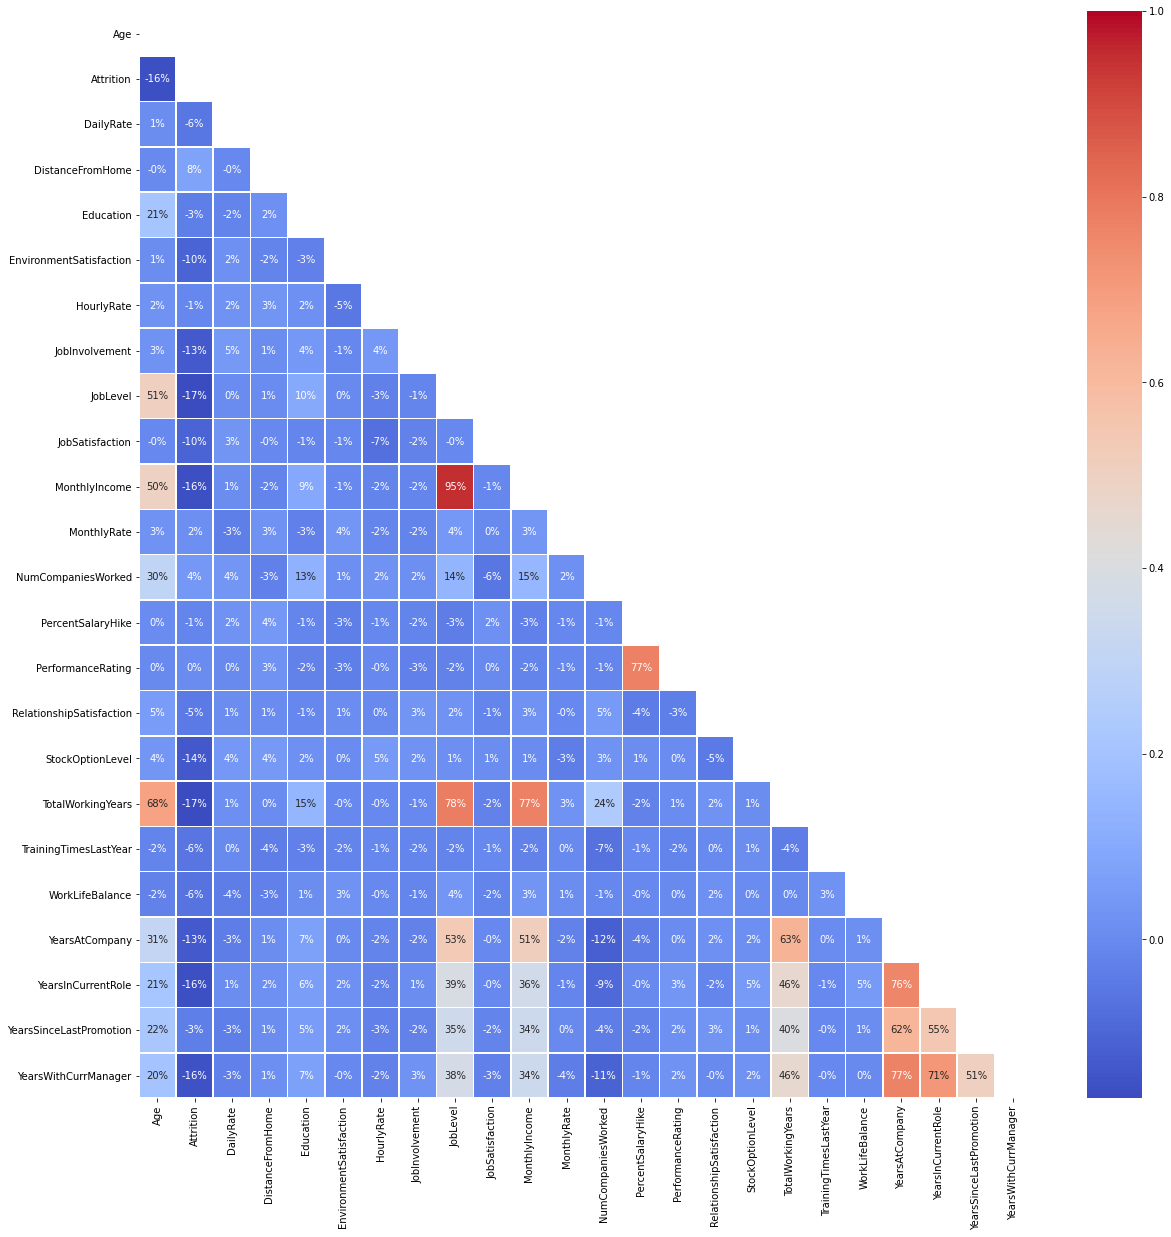

In [11]:
plt.figure(figsize=(20, 20))
# creating mask 
mask = np.triu(np.ones_like(df.corr())) 
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm", linewidths=.5, fmt= '.0%', mask = mask)

## Summary 

* JobLevel and MonthlyIncome have strong correlation(95%)
* JobLevel and TotalWorkingYears are highly correlated  (78%)
* MonthlyIncome and TotalWorkingYears are highly correlated  (77%)
* PercentSalaryHike and PerformanceRating are highly correlated  (77%)
* YearsAtCompany and YearsWithCurrManager are highly correlated  (77%)
* YearsAtCompany and YearsInCurrentRole are highly correlated  (76%)
* YearsCurrentRole and YearsWithCurrManager are highly correlated  (71%)

## Conclusion
* Monthly Income and Job Level are highly correlated with each other.
* Total Working Years, Monthly Income and Job Level are highly correlated with each other.
* Years at Company, Years with Current Manager, and Years in Current Role are highly correlated with each other. 
* Try one feature from each group and pick the one gives best score.

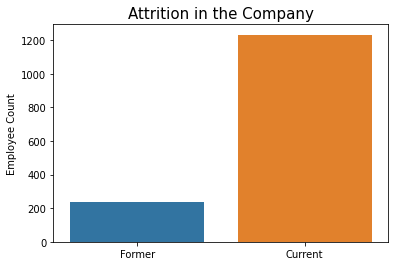

In [12]:
df2 = df['Attrition'].apply(lambda x: 'Current' if x == 0 else 'Former')
ax1 = sns.countplot(df2)
plt.title('Attrition in the Company', fontsize = 15)
plt.ylabel('Employee Count')
ax1.set(xlabel=None)
plt.show()


In [13]:
print(df2.value_counts()/len(df2))

Current    0.838776
Former     0.161224
Name: Attrition, dtype: float64


* Inbalance data?

# EDA - Categorical Varibles 

In [14]:
categorical = df.select_dtypes(include=["object"])
categorical.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [15]:
numeric = df.select_dtypes(include=["int"])
numeric.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [16]:
# Unique values of Categorical Variables
for i in categorical.columns:
    print(i, df[i].nunique())

BusinessTravel 3
Department 3
EducationField 6
Gender 2
JobRole 9
MaritalStatus 3
OverTime 2


In [17]:
c = categorical.columns

for i in c:
    xx_i = pd.DataFrame(df[df["Attrition"] == 1][i].value_counts().reset_index())
    xx_i = xx_i.rename(columns = {"index": i, i: "Count"})
    xx_i["Percent"] = xx_i["Count"]/len(df[df["Attrition"] == 1])
    print(xx_i, "\n")

      BusinessTravel  Count   Percent
0      Travel_Rarely    156  0.658228
1  Travel_Frequently     69  0.291139
2         Non-Travel     12  0.050633 

               Department  Count   Percent
0  Research & Development    133  0.561181
1                   Sales     92  0.388186
2         Human Resources     12  0.050633 

     EducationField  Count   Percent
0     Life Sciences     89  0.375527
1           Medical     63  0.265823
2         Marketing     35  0.147679
3  Technical Degree     32  0.135021
4             Other     11  0.046414
5   Human Resources      7  0.029536 

   Gender  Count   Percent
0    Male    150  0.632911
1  Female     87  0.367089 

                     JobRole  Count   Percent
0      Laboratory Technician     62  0.261603
1            Sales Executive     57  0.240506
2         Research Scientist     47  0.198312
3       Sales Representative     33  0.139241
4            Human Resources     12  0.050633
5     Manufacturing Director     10  0.042194
6  Hea

In [18]:
xx = pd.DataFrame(df["BusinessTravel"].value_counts()).sort_values("BusinessTravel").reset_index()
xx.rename(columns = {"index": "BusinessTravel", "BusinessTravel": "Employee Count"})

,BusinessTravel,Employee Count
0,Non-Travel,150
1,Travel_Frequently,277
2,Travel_Rarely,1043


In [59]:
def feature_summary_table(feature):
    feature_summary = pd.DataFrame(df.groupby(feature).agg({'Attrition':['size', 'sum', 'mean']}))
    feature_summary.columns = [' '.join(col).strip() for col in feature_summary.columns.values]
    feature_summary = feature_summary.reset_index()
    feature_summary['Attrition mean'] = (feature_summary['Attrition mean']*100).astype(int)
    feature_summary.columns = [feature, 'Employee Count', 'Attrition Count', 
                          'Attrition % in the Group'] 
    feature_summary['Attrition % in the Company'] = ((feature_summary['Attrition Count'] / 237)*100).astype(int)
    feature_summary.sort_values("Attrition Count", ascending = False)
    feature_summary = feature_summary.sort_values(['Employee Count'], ascending = False).reset_index()
    feature_summary = pd.DataFrame(feature_summary).drop(["index"], 1)
    return feature_summary


In [69]:

# Create graph for each feature to compare its attrition in the company 

def feature_chart(feature):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature_summary = pd.DataFrame(df.groupby(feature).agg({'Attrition':['size', 'sum', 'mean']}))
    feature_summary.columns = [' '.join(col).strip() for col in feature_summary.columns.values]
    feature_summary = feature_summary.reset_index()
    feature_summary['Attrition mean'] = (feature_summary['Attrition mean']*100).astype(int)
    feature_summary.columns = [feature, 'Employee Count', 'Attrition Count', 'Attrition % in the Group'] 
    feature_summary['Attrition % in the Company'] = ((feature_summary['Attrition Count'] / 237)*100).astype(int)
    feature_summary.sort_values("Attrition Count", ascending = False)
    feature_summary = feature_summary.sort_values(['Employee Count'], ascending = False).reset_index()
    feature_summary = pd.DataFrame(feature_summary).drop(["index"], 1)
    feature_summary
    
    fig, ax1 = plt.subplots(figsize=(7, 5))
    ax2 = ax1.twinx()
    feature_summary.set_index(feature_summary[feature], drop=True, inplace=True)
    feature_summary["Employee Count"].plot(kind='bar', ax= ax1, color='blue', rot = 75)
    feature_summary['Attrition % in the Group'].plot(kind='line', ax= ax2, marker='o', color='red')
    plt.title(feature  + " " + "Category Chart")
    # ax1.set_xlabel(feature)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Employee Count")
    ax1.set(xlabel=None)
    ax2.set_ylabel("Attrition % in the Group")
    ax2.yaxis.label.set_color('red')
    ax2.set_ylim(0, max(feature_summary['Attrition % in the Group']))
    plt.show()

## Business Travel

In [61]:
feature_summary_table("BusinessTravel")

,BusinessTravel,Employee Count,Attrition Count,Attrition % in the Group,Attrition % in the Company
0,Travel_Rarely,1043,156,14,65
1,Travel_Frequently,277,69,24,29
2,Non-Travel,150,12,8,5


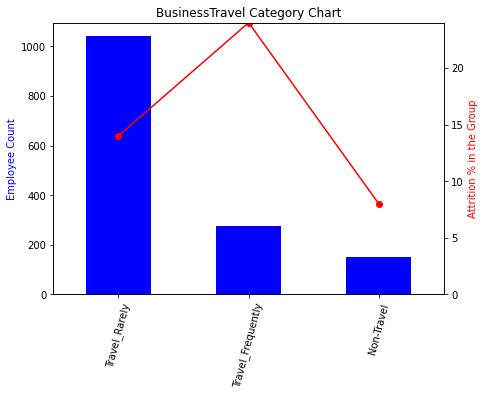

In [70]:
feature_chart("BusinessTravel")

## Department

In [71]:
feature_summary_table("Department")

,Department,Employee Count,Attrition Count,Attrition % in the Group,Attrition % in the Company
0,Research & Development,961,133,13,56
1,Sales,446,92,20,38
2,Human Resources,63,12,19,5


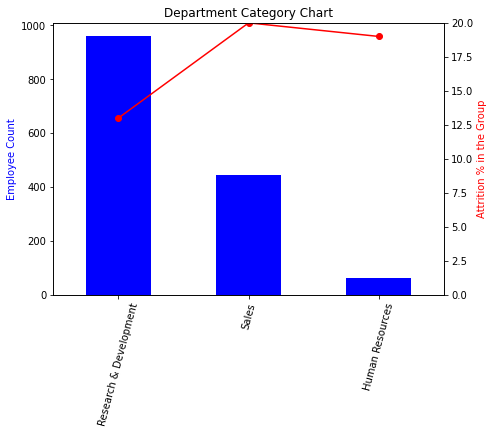

In [72]:
feature_chart("Department")

## EducationField

In [73]:
feature_summary_table("EducationField")

,EducationField,Employee Count,Attrition Count,Attrition % in the Group,Attrition % in the Company
0,Life Sciences,606,89,14,37
1,Medical,464,63,13,26
2,Marketing,159,35,22,14
3,Technical Degree,132,32,24,13
4,Other,82,11,13,4
5,Human Resources,27,7,25,2


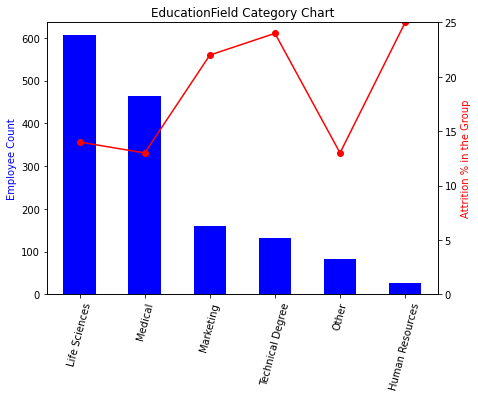

In [74]:
feature_chart("EducationField")

## Gender

In [75]:
feature_summary_table("Gender")

,Gender,Employee Count,Attrition Count,Attrition % in the Group,Attrition % in the Company
0,Male,882,150,17,63
1,Female,588,87,14,36


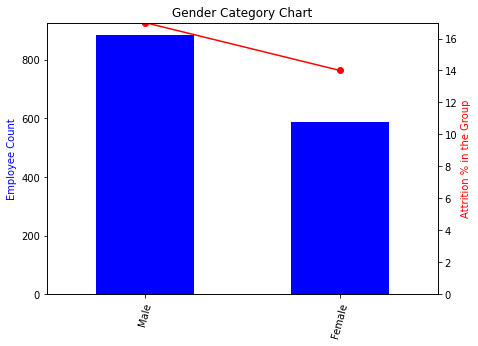

In [76]:
feature_chart("Gender")

## JobRole

In [77]:
feature_summary_table("JobRole")

,JobRole,Employee Count,Attrition Count,Attrition % in the Group,Attrition % in the Company
0,Sales Executive,326,57,17,24
1,Research Scientist,292,47,16,19
2,Laboratory Technician,259,62,23,26
3,Manufacturing Director,145,10,6,4
4,Healthcare Representative,131,9,6,3
5,Manager,102,5,4,2
6,Sales Representative,83,33,39,13
7,Research Director,80,2,2,0
8,Human Resources,52,12,23,5


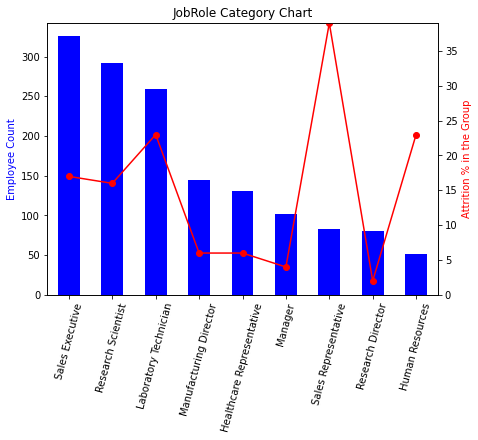

In [78]:
feature_chart("JobRole")

## MaritalStatus

In [79]:
feature_summary_table("MaritalStatus")

,MaritalStatus,Employee Count,Attrition Count,Attrition % in the Group,Attrition % in the Company
0,Married,673,84,12,35
1,Single,470,120,25,50
2,Divorced,327,33,10,13


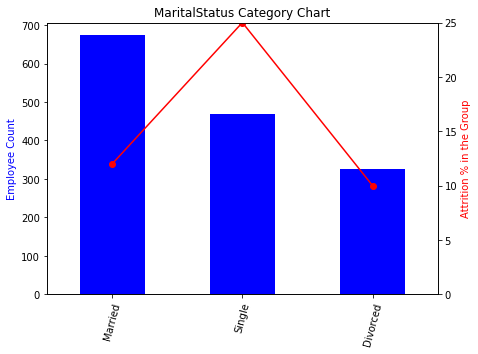

In [80]:
feature_chart("MaritalStatus")

## OverTime

In [81]:
feature_summary_table("OverTime")

,OverTime,Employee Count,Attrition Count,Attrition % in the Group,Attrition % in the Company
0,No,1054,110,10,46
1,Yes,416,127,30,53


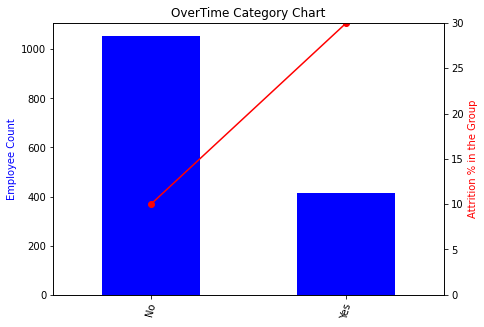

In [82]:
feature_chart("OverTime")

## Age

In [91]:
def feature_summary_table(feature):
    feature_summary = pd.DataFrame(df.groupby(feature).agg({'Attrition':['size', 'sum', 'mean']}))
    feature_summary.columns = [' '.join(col).strip() for col in feature_summary.columns.values]
    feature_summary = feature_summary.reset_index()
    feature_summary['Attrition mean'] = (feature_summary['Attrition mean']*100).astype(int)
    feature_summary.columns = [feature, 'Employee Count', 'Attrition Count', 
                          'Attrition % in the Group'] 
    feature_summary['Attrition % in the Company'] = ((feature_summary['Attrition Count'] / 237)*100).astype(int)
    return feature_summary

In [92]:

# Create graph for each feature to compare its attrition in the company 

def feature_chart(feature):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature_summary = pd.DataFrame(df.groupby(feature).agg({'Attrition':['size', 'sum', 'mean']}))
    feature_summary.columns = [' '.join(col).strip() for col in feature_summary.columns.values]
    feature_summary = feature_summary.reset_index()
    feature_summary['Attrition mean'] = (feature_summary['Attrition mean']*100).astype(int)
    feature_summary.columns = [feature, 'Employee Count', 'Attrition Count', 'Attrition % in the Group'] 
    feature_summary['Attrition % in the Company'] = ((feature_summary['Attrition Count'] / 237)*100).astype(int)
    feature_summary
    
    fig, ax1 = plt.subplots(figsize=(7, 5))
    ax2 = ax1.twinx()
    feature_summary.set_index(feature_summary[feature], drop=True, inplace=True)
    feature_summary["Employee Count"].plot(kind='bar', ax= ax1, color='blue', rot = 75)
    feature_summary['Attrition % in the Group'].plot(kind='line', ax= ax2, marker='o', color='red')
    plt.title(feature  + " " + "Category Chart")
    # ax1.set_xlabel(feature)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Employee Count")
    ax1.set(xlabel=None)
    ax2.set_ylabel("Attrition % in the Group")
    ax2.yaxis.label.set_color('red')
    ax2.set_ylim(0, max(feature_summary['Attrition % in the Group']))
    plt.show()

In [93]:
print("Minimum Age is", df["Age"].min(), "and maximum age is", df["Age"].max())

Minimum Age is 18 and maximum age is 60


In [94]:
# Create Age buckets
bins = [18, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['18-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']
df['AgeBucket'] = pd.cut(df['Age'], bins, labels = labels, include_lowest = True)
feature_summary_table('AgeBucket')

,AgeBucket,Employee Count,Attrition Count,Attrition % in the Group,Attrition % in the Company
0,18-20,28,16,57,6
1,20-25,95,28,29,11
2,25-30,263,56,21,23
3,30-35,343,60,17,25
4,35-40,276,25,9,10
5,40-45,192,18,9,7
6,45-50,130,16,12,6
7,50-55,96,10,10,4
8,55-60,47,8,17,3


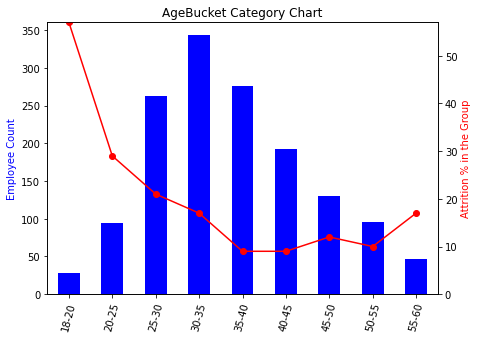

In [95]:
feature_chart("AgeBucket")

## DistanceFromHome

In [96]:
print("Minimum distance from home is", df["DistanceFromHome"].min(), "and maximum distance from home is", df["DistanceFromHome"].max())

Minimum distance from home is 1 and maximum distance from home is 29


In [98]:
df["DistanceFromHome"].value_counts().sort_index()

1     208
2     211
3      84
4      64
5      65
6      59
7      84
8      80
9      85
10     86
11     29
12     20
13     19
14     21
15     26
16     32
17     20
18     26
19     22
20     25
21     18
22     19
23     27
24     28
25     25
26     25
27     12
28     23
29     27
Name: DistanceFromHome, dtype: int64

In [99]:
# Create Age buckets
bins = [1, 5, 10, 15, 20, 25, 30]
labels = ['1-5', '5-10', '10-15', '15-20', '20-25', '25-30']
df['DistanceFromHomeBucket'] = pd.cut(df['DistanceFromHome'], bins, labels = labels, include_lowest = True)
feature_summary_table('DistanceFromHomeBucket')

,DistanceFromHomeBucket,Employee Count,Attrition Count,Attrition % in the Group,Attrition % in the Company
0,1-5,632,87,13,36
1,5-10,394,57,14,24
2,10-15,115,25,21,10
3,15-20,125,23,18,9
4,20-25,117,32,27,13
5,25-30,87,13,14,5


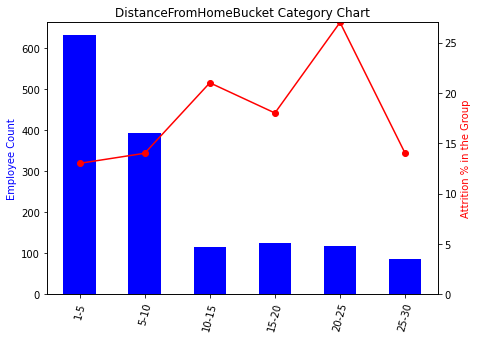

In [100]:
feature_chart("DistanceFromHomeBucket")

## Summary
* 65% of attrition are made up from rarely traveling employees. 
* 95% of attrition are made up from Research & Development or Sales department.
* 70% of attrition are made up from employees who are educated in Life Sciences or Medical.
* 50% of attrition are made up from Laboratory Technician and Sales executives.
* 63% of attrition are males.
* 50% of attrition are single employees.
* 53% of attrition are made up from over time working employees.

# Statistical Inferences

Our objective is to find if there is any relation between Gender and Attrition and as both are categorical variables, we perform a chi-square test where our null hypothesis is that these two variables are highly related to each other.

In [42]:
gender_table = pd.crosstab(index = df["Gender"], columns=df["Attrition"])
gender_table

Attrition,0,1
Gender,,
Female,501,87
Male,732,150


In [43]:
import scipy
chi2, p, ddof, expected = scipy.stats.chi2_contingency(gender_table)
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 1.1169671241970975
p-value: 0.29057244902890855
Degrees of Freedom: 1

[[493.2  94.8]
 [739.8 142.2]]


The p-value is 0.29057244902890855 and as the p-value is greater than significance level 0.05. 
So, we accept the null hypothesis that these two variables are correlated with each other.

*****************

In [44]:
# female and  male variables
female = df[df['Gender'] == 'Female']
male = df[df['Gender'] == 'Male']

# Find the mean
female_attrition_mean = female['Attrition'].mean()
male_attrition_mean = male['Attrition'].mean()

# Tge difference between means
diff_mean = male_attrition_mean - female_attrition_mean
diff_mean

0.022108843537414963

In [45]:
import scipy.stats as stats
stats.ttest_ind(a=female_attrition_mean, b=male_attrition_mean, equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [46]:
# Compute z-score           
p_est = (np.sum(male['Attrition']) + np.sum(female['Attrition'])) / (len(male) + len(female))
z = (diff_mean) / np.sqrt(p_est * (1 - p_est) * (( 1/ float(len(male))) + (1/float(len(female)))))
p_value = stats.norm.cdf(-z)*2
p_value

0.2587903704911598

So the p value 0.2587903704911598 and bigger than the significance level (0.05). So, I fail to reject the null hypothesis. 
There is no significant difference between the male and female attrition rate employees in the company.
They are similar.

# Model

In [101]:
df = df.drop(["AgeBucket", "DistanceFromHomeBucket"],1)

### Imbalanced Data

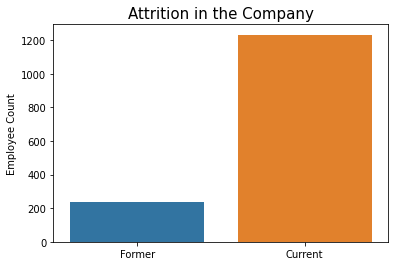

In [102]:
xx = df['Attrition'].apply(lambda x: 'Current' if x == 0 else 'Former')
ax1 = sns.countplot(xx)
plt.title('Attrition in the Company', fontsize = 15)
plt.ylabel('Employee Count')
ax1.set(xlabel=None)
plt.show()

In [49]:
xx.value_counts()

Current    1233
Former      237
Name: Attrition, dtype: int64

### Random Over Sampling

In [50]:
# Class count
count_class_0, count_class_1 = df["Attrition"].value_counts()
print("class_0:", count_class_0)
print("Class_1:", count_class_1)

class_0: 1233
Class_1: 237


In [51]:
# Divide by class
df_class_0 = df[df["Attrition"] == 0]
df_class_1 = df[df["Attrition"] == 1]

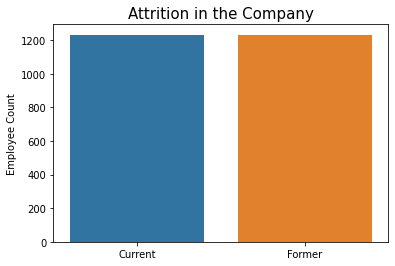

In [52]:
from sklearn.utils import resample
# df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over = resample(df_class_1, replace = True, n_samples = 1233, random_state = 123) 
df_balanced = pd.concat([df_class_0, df_class_1_over], axis=0)

xx = df_balanced['Attrition'].apply(lambda x: 'Current' if x == 0 else 'Former')
ax1 = sns.countplot(xx)
plt.title('Attrition in the Company', fontsize = 15)
plt.ylabel('Employee Count')
ax1.set(xlabel=None)
plt.show()


In [53]:
print(df_balanced["Attrition"].value_counts())

1    1233
0    1233
Name: Attrition, dtype: int64


### Import all necessary packages

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, roc_curve, roc_auc_score

In [68]:
def model_all_features(selected_model, selected_data):
    
    # Create dummy variables
    selected_data = pd.get_dummies(selected_data, columns = categorical.columns, drop_first = True)
    y = selected_data["Attrition"]
    X = selected_data.drop(["Attrition"],1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
    model = selected_model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Accuracy Score", "\n", accuracy, "\n")
    
    print("f1 score", "\n", f1_score(y_test, y_pred), "\n")
    
    print("Classification Report", "\n", classification_report(y_pred, y_test), "\n")
    
    print("Confusion Matrix")
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, square=True, annot=True, annot_kws={"size": 16}, fmt='d', cbar=False, cmap = 'Blues_r')
    plt.xlabel('Predicted', fontsize = 14)
    plt.ylabel('Actual', fontsize = 14)
    plt.show()
    
    print("ROC Curve")
    y_pred = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    y_pred = y_pred[:, 1]
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    # plt.plot(fpr, tpr, marker='.', label='RFC')

    rfc_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr, tpr, label='RFC (area = %0.2f)' % rfc_roc_auc)

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()
    

# Logistic Regression

### Imbalanced Data with no Tuning

Accuracy Score 
 0.8820861678004536 

f1 score 
 0.48000000000000004 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       411
           1       0.34      0.80      0.48        30

    accuracy                           0.88       441
   macro avg       0.66      0.84      0.71       441
weighted avg       0.94      0.88      0.90       441
 

Confusion Matrix


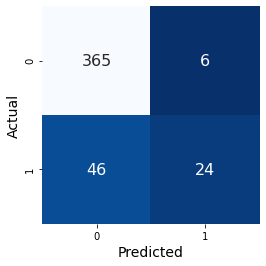

ROC Curve


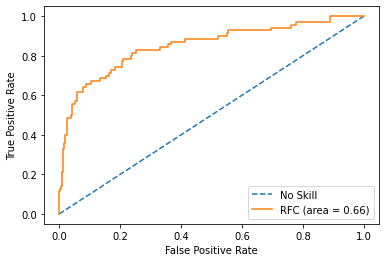

In [72]:
model_all_features(LogisticRegression(), df)

### Grid Search

Accuracy Score 
 0.8412698412698413 

f1 score 
 0.0 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       441
           1       0.00      0.00      0.00         0

    accuracy                           0.84       441
   macro avg       0.50      0.42      0.46       441
weighted avg       1.00      0.84      0.91       441
 

Confusion Matrix


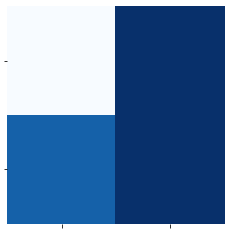

ROC Curve


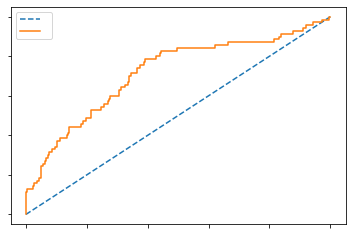

In [93]:
# Set up parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100]}

# Set up default estimator
estimator = LogisticRegression(random_state = 0, solver = 'lbfgs')

# Functions for tuning logistic regression with pca features
model_all_features(GridSearchCV(estimator, param_grid, cv = 5, scoring = 'f1'), df)

In [91]:
np.arange(1, 1000)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### Balanced Data

Accuracy Score 
 0.7554054054054054 

f1 score 
 0.7550744248985115 

Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.78      0.76       359
           1       0.78      0.73      0.76       381

    accuracy                           0.76       740
   macro avg       0.76      0.76      0.76       740
weighted avg       0.76      0.76      0.76       740
 

Confusion Matrix


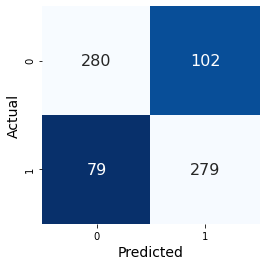

ROC Curve


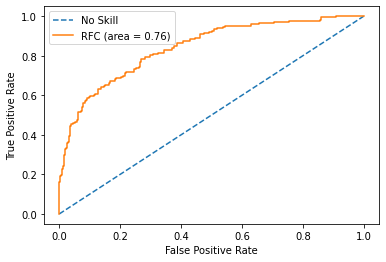

In [74]:
model_all_features(LogisticRegression(), df_balanced)

# Random Forest

### Imbalanced Data with no tuning

Accuracy Score 
 0.8684807256235828 

f1 score 
 0.3409090909090909 

Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93       423
           1       0.21      0.83      0.34        18

    accuracy                           0.87       441
   macro avg       0.60      0.85      0.63       441
weighted avg       0.96      0.87      0.90       441
 

Confusion Matrix


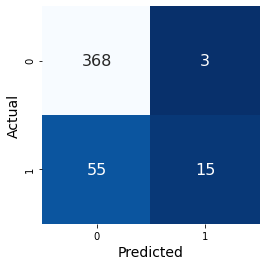

ROC Curve


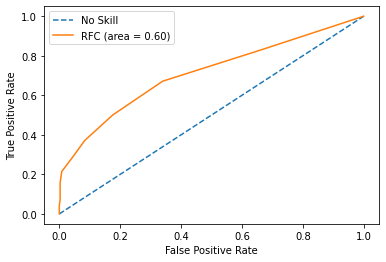

In [75]:
model_all_features(RandomForestClassifier(), df)

### Grid Search

In [88]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 2, 5, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [5, 25, 70],
    # 'min_samples_split': [8, 10, 12],
    # 'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
    'n_estimators': [50, 100, 200, 500, 1000, 1500, 2000]
}

# Instantiate the grid search model
model_all_features(GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 5, 
                           n_jobs = -1, verbose = 2, scoring = "f1"), df)

Fitting 5 folds for each of 315 candidates, totalling 1575 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
exception calling callback for <Future at 0x7feec6363b90 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/fatimasoytemiz/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/fatimasoytemiz/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "/Users/fatimasoytemiz/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/fatimasoytemiz/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 759, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/fatimasoytemiz/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 716, in _dispatch
    job = self._backend.apply_async

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

### Balanced Data

Accuracy Score 
 0.9540540540540541 

f1 score 
 0.953804347826087 

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       362
           1       0.98      0.93      0.95       378

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.96      0.95      0.95       740
 

Confusion Matrix


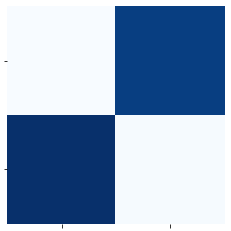

ROC Curve


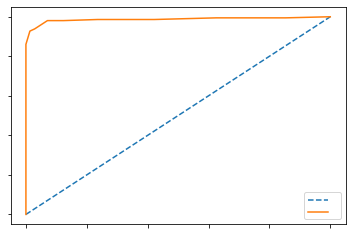

In [87]:
model_all_features(RandomForestClassifier(), df_balanced)

Accuracy Score 
 0.8526077097505669 

f1 score 
 0.2528735632183908 

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       424
           1       0.16      0.65      0.25        17

    accuracy                           0.85       441
   macro avg       0.57      0.75      0.59       441
weighted avg       0.95      0.85      0.89       441
 

Confusion Matrix


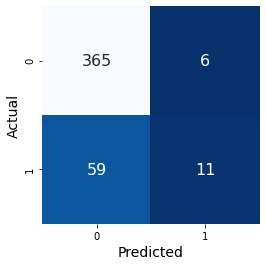

ROC Curve


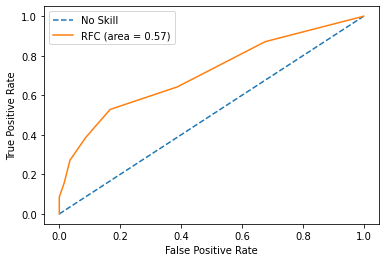

In [80]:
model_all_features(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0), df)

# Feature Importance

30


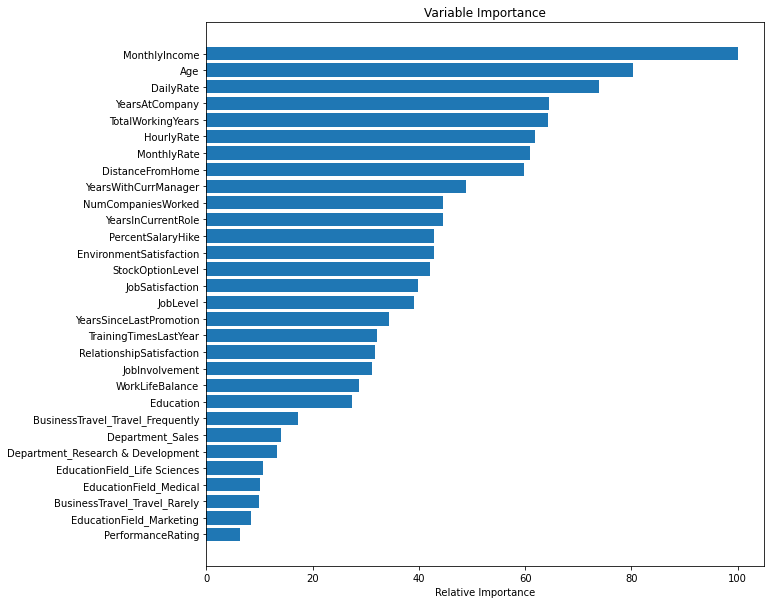

In [143]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Scale Data

In [93]:
#scale data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [94]:
from sklearn.metrics import f1_score
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model2 = clf.fit(X_train_scaled, y_train)
y_pred = model2.predict(X_test_scaled)
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Accuracy = %.3f' % (ac))

Accuracy = 0.862


In [95]:
#Classification Report for Random Forest
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       428
           1       0.16      0.85      0.27        13

    accuracy                           0.86       441
   macro avg       0.58      0.85      0.59       441
weighted avg       0.97      0.86      0.90       441



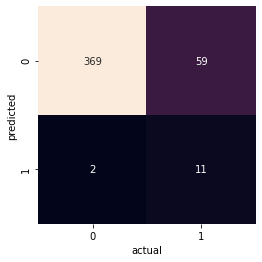

In [96]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('actual')
plt.ylabel('predicted');

## ROC Curve

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


y_pred = rfc_cv.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
# plt.plot(fpr, tpr, marker='.', label='RFC')

rfc_roc_auc = roc_auc_score(y_test, rfc2_cv.predict(X_test))
plt.plot(fpr, tpr, label='RFC (area = %0.2f)' % rfc_roc_auc)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()